In [4]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [5]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [6]:
from RF_regressor import RFRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [8]:
rf_model = RFRegressor()
rf_model.set_data(X,y)
Plotter = Plotter()

In [9]:
with open(f'{path}Opt_Model/opt_RF_model_all_features.pickle', 'rb') as file:
    opt_rf= pickle.load(file)

In [10]:
errores = opt_rf.cv_results_['mean_test_score'][:100]


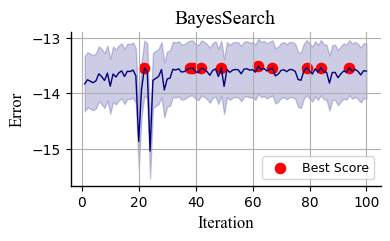

Top 1: Iteration 62, Score -13.509066321156386
Top 2: Iteration 84, Score -13.53321679099264
Top 3: Iteration 79, Score -13.533515914400038
Top 4: Iteration 94, Score -13.53430491447396
Top 5: Iteration 42, Score -13.538485501210065
Top 6: Iteration 67, Score -13.539969260457033
Top 7: Iteration 39, Score -13.540748169905495
Top 8: Iteration 38, Score -13.541280763633356
Top 9: Iteration 49, Score -13.541313727556911
Top 10: Iteration 22, Score -13.541946727251954


In [11]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [12]:
best_params_rf = rf_model.best_hyper(opt_rf, num_max=100)

In [13]:
results, best_model_results, best_model , residual_model= rf_model.trainer_2(params_=best_params_rf[0])

In [25]:
with open(f'{path}Opt_Model_2/BestModel_RF_all_features.pickle', 'wb') as file:
    pickle.dump(rf_model.model, file)
with open(f'{path}Opt_Model_2/results_RF_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)
with open(f'{path}Opt_Model_2/residual_model_RF_model_all_features.pickle', 'wb') as file:
    pickle.dump(residual_model, file)

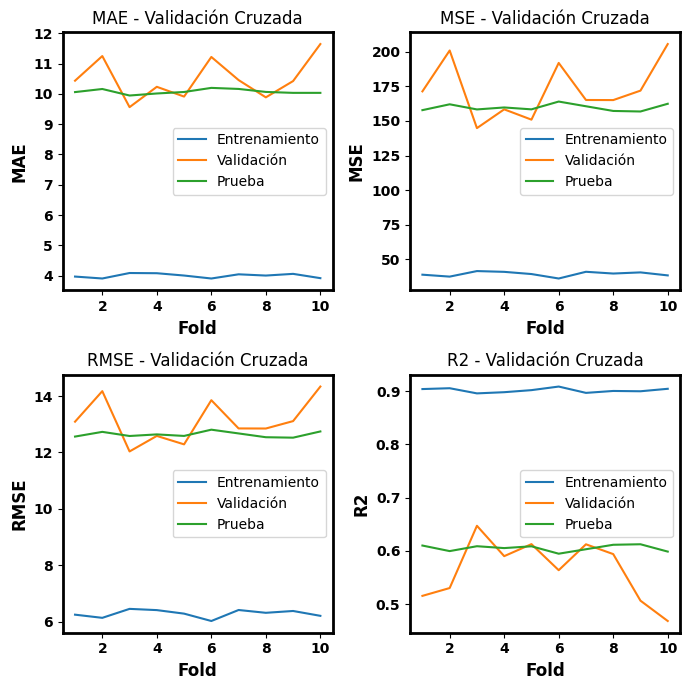

In [15]:
Plotter.plot_metricas_evaluacion(results)

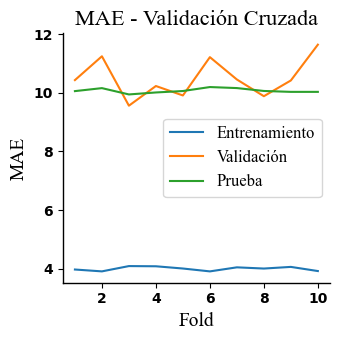

In [16]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [18]:
y_pred = rf_model.predicter_corrected_2(X_test = rf_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     456.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           2.78e-60
Time:                        13:34:52   Log-Likelihood:                -985.35
No. Observations:                 276   AIC:                             1975.
Df Residuals:                     274   BIC:                             1982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9727      1.328     17.302      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


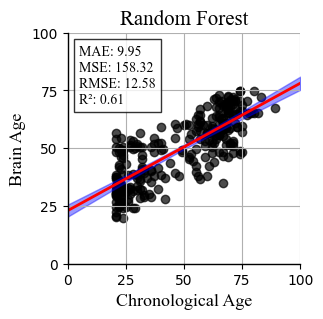

Error medio absoluto: 9.94608154943351
Error cuadrático medio: 158.31679135823669
Raíz del error cuadrático medio: 12.582400063510804
Coeficiente de determinación (R²): 0.608811620241531


In [19]:
Plotter.plot_regresion(y=y_pred,x= rf_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='Random Forest',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [20]:
shap_values, shap_summary_sorted = rf_model.feature_importance_shap(X_test=rf_model.X_test,model=rf_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 401.1680953891255
IAF_OCC_right: 386.6473803750387
IAF_OCC_left: 385.41221405298296
Low_subj_spec_EPP_PARIET_right: 228.38560934410083
High_subj_spec_RPD_CING_right: 220.11297100876388
High_subj_spec_EPP_CING_right: 202.69950314850044
Low_subj_spec_EPP_PARIET_left: 174.17876172109587
Alpha2_canon_EPP_PARIET_left: 169.28787902155807
Low_subj_spec_RPD_CING_right: 159.54740422642885
Low_subj_spec_RPD_HPC_left: 142.90651330421616
Alpha2_canon_RPD_HPC_left: 137.42323950237747
Alpha2_canon_RPD_PARIET_left: 137.39748965925062
Alpha2_canon_EPP_HPC_left: 128.62264968918487
Low_subj_spec_RPD_OCC_left: 127.35390969129757
High_subj_spec_EPP_HPC_left: 116.06325006704085
IAF_INS_left: 112.20232748255255
Alpha2_canon_RPD_CING_right: 110.24893104529906
High_subj_spec_RPD_HPC_left: 104.32641469521882
Low_subj_spec_EPP_OCC_left: 102.82186554839524
Alpha2_canon_RPD_PARIET_right: 95.22769770017456
Alpha2_canon_EPP_

In [26]:
with open(f'{path}Opt_Model_2/shap_values_rf.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_rf.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

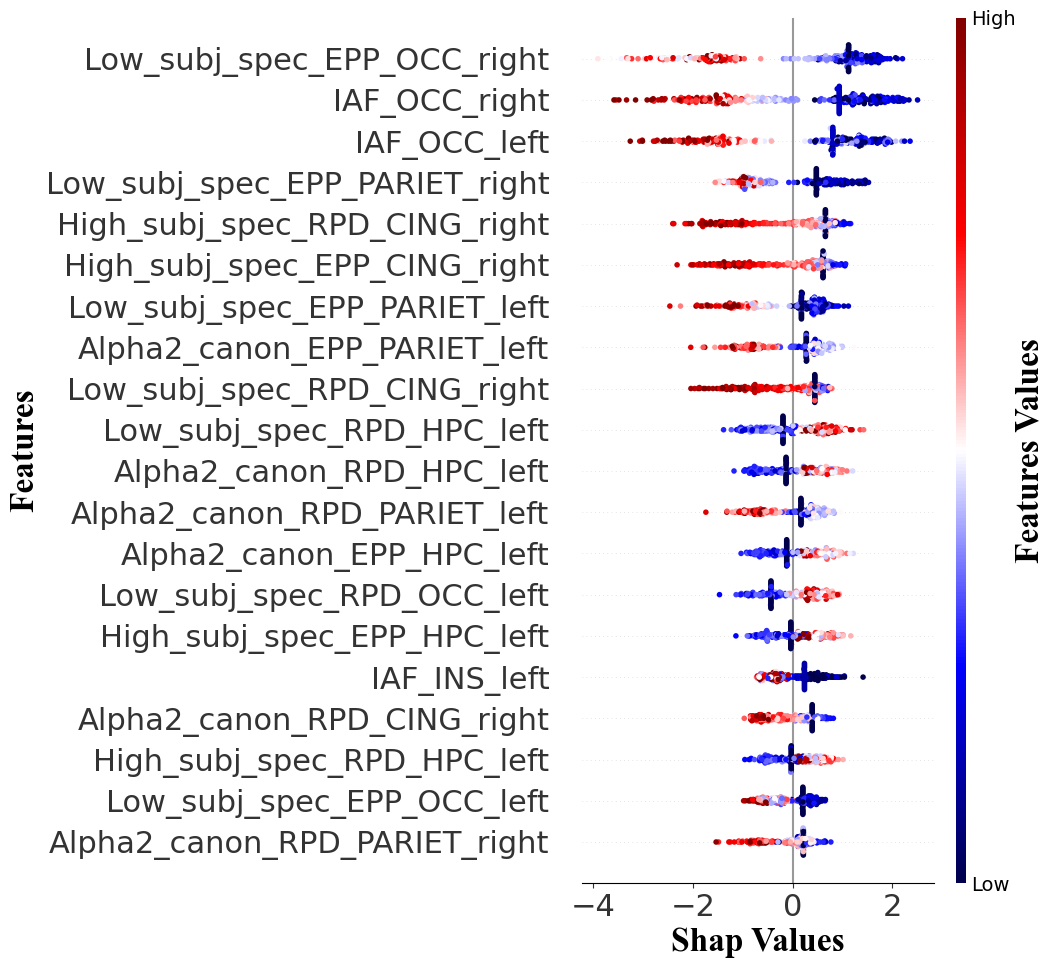

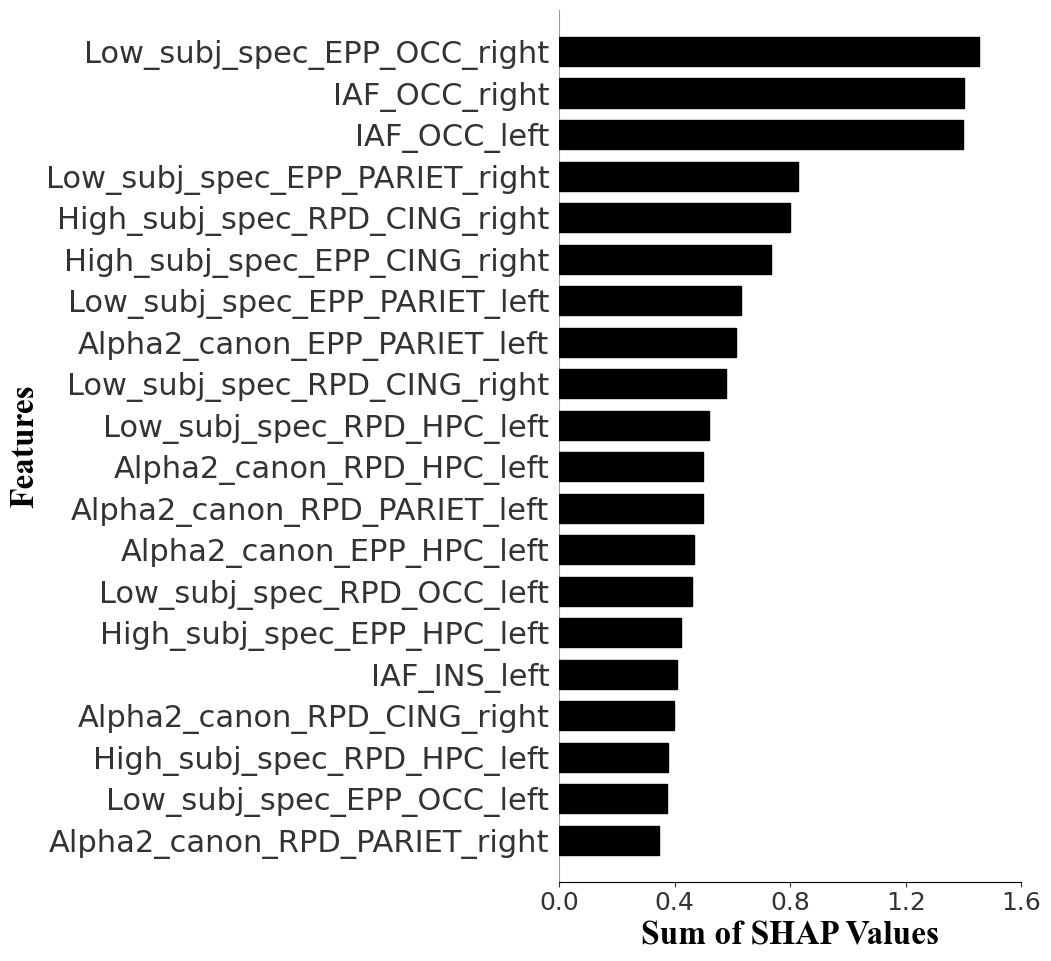

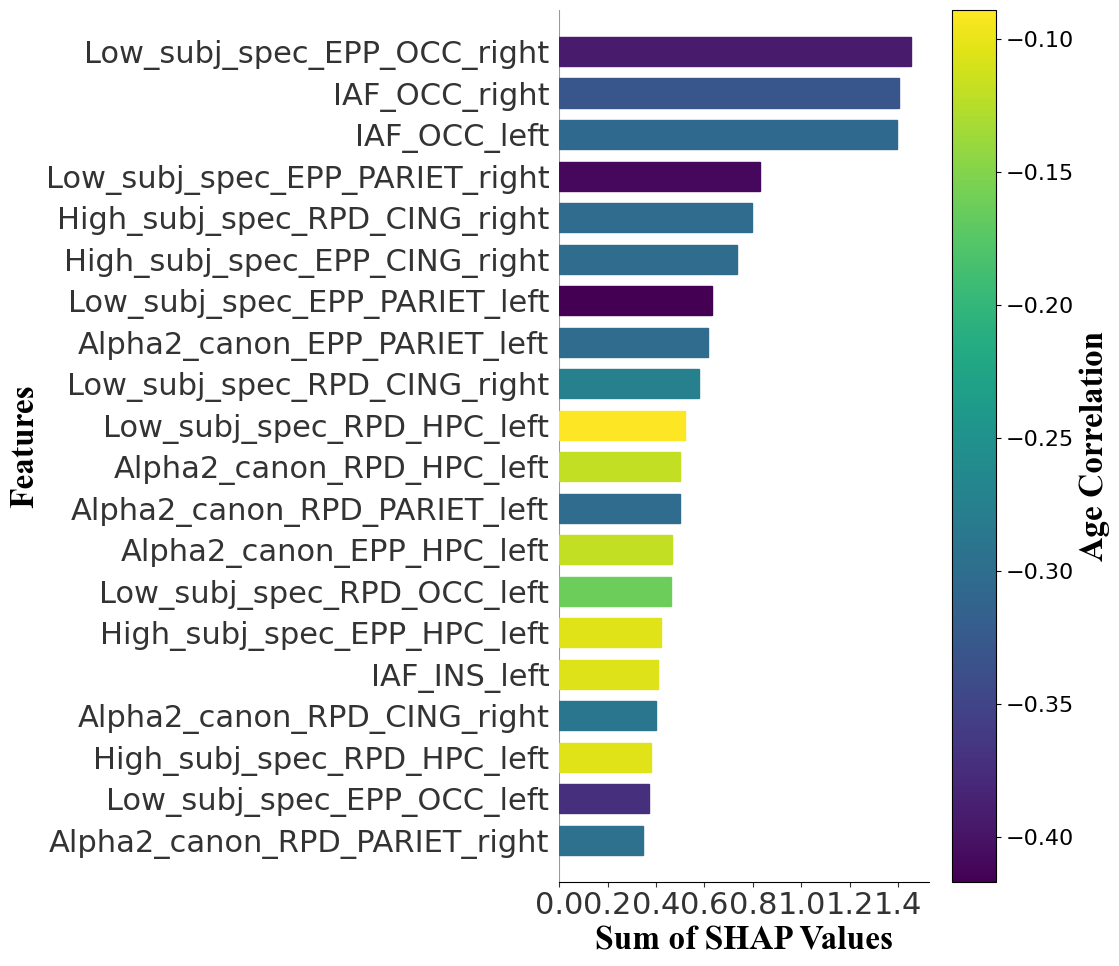

In [21]:
Plotter.plot_feature_importance(shap_values=shap_values,X_test=rf_model.X_test,y_test=rf_model.y_test, font= "Times New Roman", fontsize=24, xlabel1='Shap Values', xlabel2='Sum of SHAP Values',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [22]:
shap_por_region_sorted, resultado_normalizado_sorted=rf_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

OCC_right: 1.000000
CING_right: 0.879151
HPC_left: 0.798845
OCC_left: 0.781386
PARIET_left: 0.610377
PARIET_right: 0.410773
INS_left: 0.142422


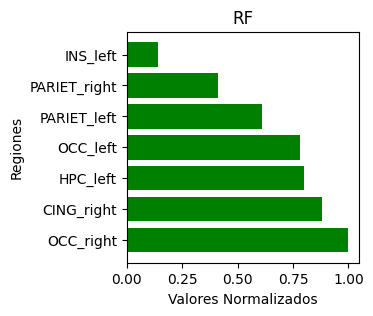

In [23]:
Plotter.plot_normalized_values(resultado_normalizado_sorted, color='green', name_set='RF',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


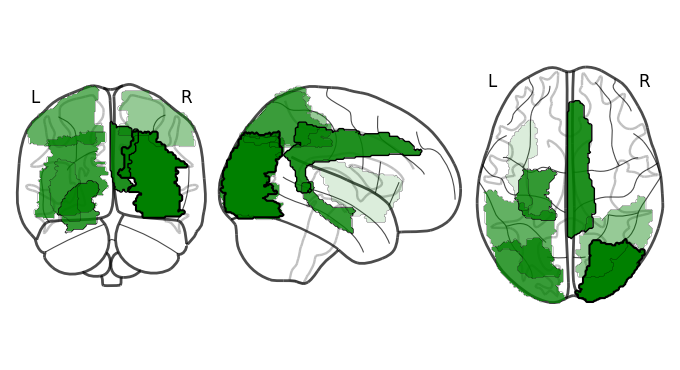

In [24]:
base_path = f'{path}cerebritos/'

Plotter.plot_brain_regions(resultado_normalizado_sorted, base_path, color='green')